# NLTK - Text Mining

* Exploraremos recursos da nltk
* Recursos para trabalhar com NLP
* Abordaremos as features da biblioteca com corpus da própria nltk.
* Aplicaremos a NLTK em uma base de dados real

**Importe a Biblioteca NLTK**

In [128]:
import nltk

#### Faça download da base de corpus da nltk

In [129]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

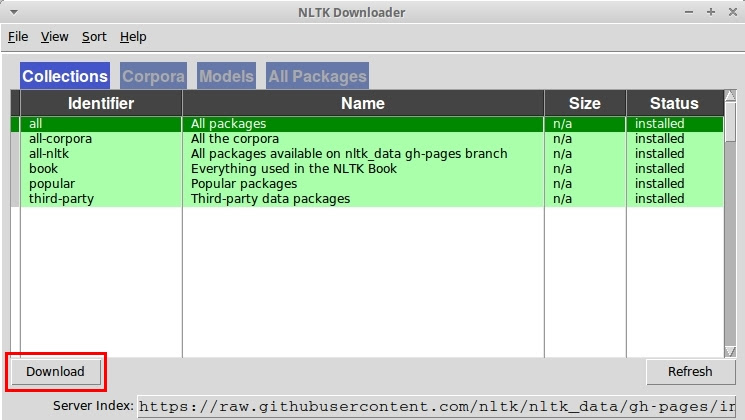

In [130]:
from IPython.display import Image
Image('./materiais_de_apoio/nltk-downloader.jpg')

**Importe o corpus brown e imprime suas categorias**

* Corpus com milhares de palavras de várias categorias

In [131]:
from nltk.corpus import brownwn

ImportError: cannot import name 'brownwn' from 'nltk.corpus' (D:\Desenvolvimento\Anaconda\lib\site-packages\nltk\corpus\__init__.py)

In [ ]:
brown.categories()

In [ ]:
len(brown.words())

In [ ]:
len(brown.words(categories='news'))

In [ ]:
brown.words()

**Visualizando sentenças da categoria romance**

In [ ]:
brown.sents(categories=['romance'])

**Quantidade de sentenças da categoria**

In [ ]:
len(brown.sents(categories=['romance']))

**Obtem as palavras do corpus**

In [ ]:
brown.words()

In [ ]:
# Obtem as palavras do corpus romance

In [ ]:
palavras = brown.words(categories=['romance'])

In [ ]:
len(palavras)

**Obter a frequencia de palavras**

In [ ]:
# Obtem a frequência de cada palavra

In [ ]:
fdist = nltk.FreqDist(p.lower() for p in palavras)

In [ ]:
fdist

In [ ]:
fdist.most_common(10)

##### Palavras ordenadas por ordem alfabética

In [ ]:
# Imprime as 50 primeiras palavras
sorted(set(palavras))[:50]

**Obtem a frequencia de uma palavra no corpus**

In [ ]:
palavras.count("love")

In [ ]:
palavras.count("hate")

**Descobrindo a frequencia em percentual de uma palavra no texto**

In [ ]:
def palavra_percentual(freq, dataset):
    total = len(dataset)
    return 100 * freq / total

In [ ]:
palavra_percentual(palavras.count('love'), palavras)

**Transforma palavras em objeto texto**
* Para isso deve-se passar uma lista de palavras para essa classe

In [ ]:
palavras = nltk.Text(palavras)

In [ ]:
type(palavras)

**Imprime palavras similares**

In [ ]:
# Imprime as palavras mais similares por contexto.
palavras.similar('love', num=30) # Retorna uma lista das palavras similares # Palavras mais similares no contexto onde aparece Minas

**Conjuntos de Palavras empregadas similarmente**

In [ ]:
palavras.collocation_list()

**Concordancia das palavras**

In [ ]:
# Contexto na qual a palavra aparece
palavras.concordance('love')

**Empregabilidade comuns das palavras**

In [ ]:
palavras.common_contexts(['love','hate']) # and_him pertence a love e i_you pertence a hate

**Disperção Léxica de palavras no dataset**

In [ ]:
%matplotlib inline

palavras.dispersion_plot(["love", "hate","man"])

# Aplicando NLTK em uma base de dados real

* Usaremos uma base de dados real de tweets sobre o governo de Minas Gerais
* O twitter é um serviço muito utilizado por empresas para análises
* Trabalhar com o idioma portugues ainda é um desafio

In [ ]:
from IPython.display import Image
Image('./materiais_de_apoio/twitter_5.png',width=600, height=400)

#### Ler Bases

In [ ]:
import pandas as pd

In [ ]:
tweets = pd.read_csv('./materiais_de_apoio/Tweets_Mg.csv')

In [ ]:
tweets.head()

In [ ]:
tweets.Text.head()

In [ ]:
tweets.count()

**Tokenization dos tweets**

* Tokenização é a capacidade de reconhecer palavras e sentenças em uma frase ou texto.
* Existem diversos tipos de tokenizadores.
* Conheça o domínio na qual voce está trabalhando.

In [ ]:
from nltk.tokenize import word_tokenize
word_tokenize("RT @rodrigofs10 I like very Loooooot this movieee!!, thanks ;) :) :-)")

In [ ]:
from nltk.tokenize import TweetTokenizer # Token especialista para dados do Twitter

In [ ]:
tweet_tokenize = TweetTokenizer()

In [ ]:
tweet_tokenize.tokenize("RT @rodrigofs10 I like very Loooooot this movieee!!, thanks ;) :) :-)")

In [ ]:
tweet_tokenize = TweetTokenizer()


In [ ]:
for t in tweets.Text.head(50).items():
    print("Tweets: ", t[1])
    print('Tokens: ', tweet_tokenize.tokenize(t[1]))

#### Gera uma lista de palavras a partir dos tokens ou termos da base de dados.

In [ ]:
from functools import reduce
import operator

list_palavras = []

for t in tweets.Text.items():
    list_palavras.append(t[1].split())

# Reduz a lista de palavras em apenas uma llista única de elementos
list_palavras = reduce(operator.concat, list_palavras)
list_palavras

In [ ]:
list_palavras # Antes de aplicar o reduce

In [ ]:
len(list_palavras)

**Gera um objeto do tipo *nltk.Text* a partir da lista de palavras.**

In [ ]:
tweets_text_nltk = nltk.Text(list_palavras)

#### Imprime Tokens

In [ ]:
tweets_text_nltk.tokens

**Encontrando a frequencia do token 'Minas' e 'Pimental'**

In [ ]:
tweets_text_nltk.count('Minas')

In [ ]:
tweets_text_nltk.count('Pimentel')

In [ ]:
palavra_percentual(list_palavras.count('Minas'), list_palavras)

In [ ]:
palavra_percentual(list_palavras.count('Pimentel'), list_palavras)

**Similaridade de palavras por contextos**

In [ ]:
tweets_text_nltk.similar('Minas', num=10) # Palavras mais similares no contexto onde aparece Minas

In [ ]:
tweets_text_nltk.similar('Gerais')

In [ ]:
tweets_text_nltk.similar('Pimentel')

In [ ]:
tweets.Text.values[0]

**Conjuntos de Palavras empregadas similarmente**

In [ ]:
tweets_text_nltk.collocation_list() # palavras empregadas juntas

In [ ]:
# Obtem a frequencia de cada palavra
fdist = nltk.FreqDist(p.lower() for p in list_palavras)

In [ ]:
fdist.most_common(20)

#### Removendo o StopWords

In [ ]:
# Define a lista de Stopwords
stopwords = set(nltk.corpus.stopwords.words('portuguese'))

In [ ]:
stopwords

In [ ]:
list_palavras = [i.lower() for i in list_palavras if i.lower() not in stopwords]

In [ ]:
list_palavras

In [ ]:
fdist = nltk.FreqDist([p.lower() for p in list_palavras])

In [ ]:
fdist.most_common(20)

# **Trabalhando com Bigrams e Trigrams**

* **n-grams** é uma sequencia continua de n itens para uma amostra de texto ou fala.
* **Unigram** palavras únicas

* **Bigrams** são pares de palavras.
* **Trigrams** são trio de palavras.
* **Palavas** juntas são também conhecidas como **Colocações**

* Unigramns normalmente **não contém** muita informação quando se comparado com bigramns e trigrams.
* Quanto mais palavras mais **contexto** sobre a estrutura da linguagem.
* Você deve avaliar o uso de n-gramns levando isso em consideração no seu projeto.

In [ ]:
import nltk
from nltk import bigrams, trigrams

**Visualizando trigramns**

In [ ]:
list(bigrams(['O rato', 'roeu', 'roupa', 'do rei', 'de roma']))

 **Visualizando trigramns**

In [ ]:
list(trigrams(['O rato', 'roeu', 'roupa', 'do rei', 'de roma']))

**Imprimindo bigramns com a base de tweets**

In [ ]:
print(list(nltk.bigrams(list_palavras)))

**Imprimindo trigramns com a base de tweets**

In [ ]:
print(list(nltk.trigrams(list_palavras)))